# Breast Cancer Classification using SVM

### Import libraries

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
import skimage.io
from skimage.transform import resize
from sklearn.utils.multiclass import unique_labels

### Function to load images from structured directory

In [2]:
# code reference: https://github.com/whimian/SVM-Image-Classification/blob/master/Image%20Classification%20using%20scikit-learn.ipynb

def load_image_files(container_path, dimension=(224, 224)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images)

## Binary Classification (Benign or Malignant)

### Load data

In [3]:
%%time
image_dataset = load_image_files("C:/Users/Abdullah Abid/Desktop/Project/BreakHis Data Classes/")

Wall time: 10min 40s


### Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3, random_state=100)

### SVM Classifier

In [6]:
%%time

params = [{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100]},
          {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
          {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10, 100]}]

svc = svm.SVC(gamma='scale')
clf = GridSearchCV(svc, params, iid='False', cv=5)
clf.fit(X_train, y_train)

Wall time: 30min 52s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.best_params_

In [7]:
%%time
y_pred = clf.predict(X_test)

Wall time: 13min 12s


### Classification report

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72       743
           1       0.85      0.94      0.89      1630

    accuracy                           0.84      2373
   macro avg       0.84      0.79      0.81      2373
weighted avg       0.84      0.84      0.84      2373



In [9]:
image_dataset.target_names

['Benign', 'Malignant']

### Confusion matrix

In [14]:
# code reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [15]:
class_names = np.array(image_dataset.target_names)

Confusion matrix, without normalization
[[ 475  268]
 [ 103 1527]]


<IPython.core.display.Javascript object>


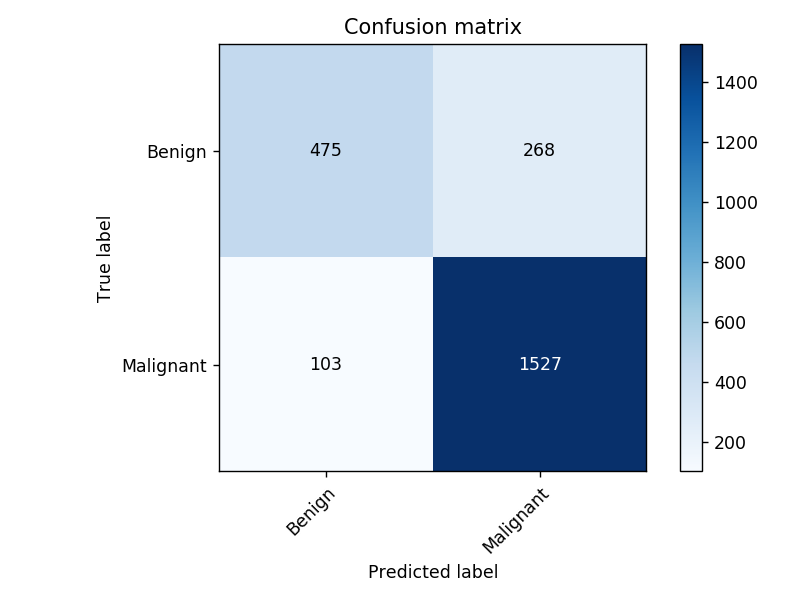

In [16]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')
plt.show()

# Multiclass Classification (A, DC, F, LC, MC, PC, PT or TA)

### Load data

In [17]:
%%time
image_dataset = load_image_files("C:/Users/Abdullah Abid/Desktop/Project/BreakHis Data Subclasses/")

Wall time: 9min 56s


### Train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3, random_state=100)

### SVM Classifier

In [20]:
%%time

params = [{'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100]},
          {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
          {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10, 100]}]

svc = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf = GridSearchCV(svc, params, iid='False', cv=5)
clf.fit(X_train, y_train)

Wall time: 1h 10min 38s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.best_params_

In [21]:
%%time
y_pred = clf.predict(X_test)

Wall time: 23min 3s


### Classification report

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.10      0.16       146
           1       0.59      0.97      0.73      1015
           2       0.43      0.71      0.53       298
           3       0.78      0.24      0.36       189
           4       0.56      0.13      0.20       239
           5       0.33      0.01      0.01       185
           6       0.60      0.04      0.08       140
           7       0.32      0.12      0.18       161

    accuracy                           0.55      2373
   macro avg       0.51      0.29      0.28      2373
weighted avg       0.53      0.55      0.46      2373



In [23]:
image_dataset.target_names

['A', 'DC', 'F', 'LC', 'MC', 'PC', 'PT', 'TA']

### Confusion matrix

In [24]:
# code reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [25]:
class_names = np.array(image_dataset.target_names)

Confusion matrix, without normalization
[[ 14  62  64   0   1   1   0   4]
 [  2 981  21   6   0   0   2   3]
 [  4  71 211   2   6   0   0   4]
 [  2 130   2  45   9   0   1   0]
 [  3 164  26   3  30   1   1  11]
 [  5 150  12   1   3   1   0  13]
 [  2  37  87   1   0   0   6   7]
 [  0  64  72   0   5   0   0  20]]


<IPython.core.display.Javascript object>


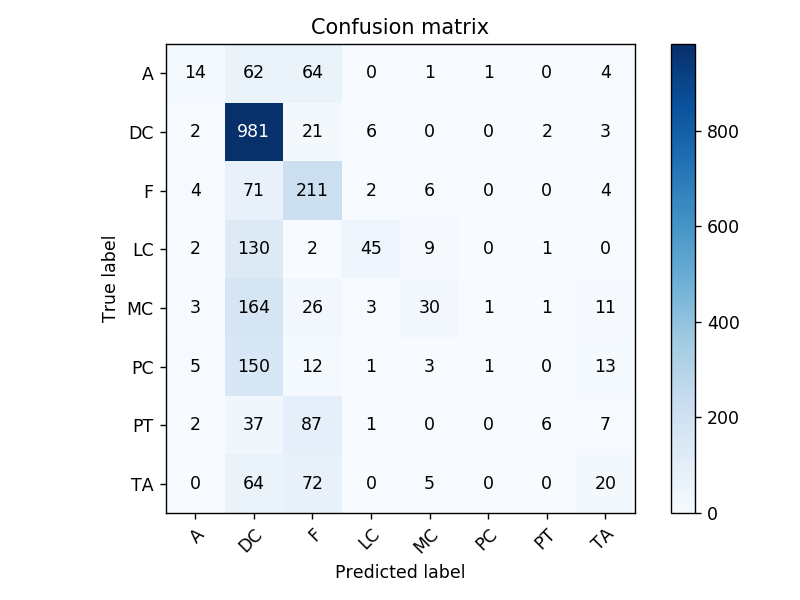

In [26]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix')
plt.show()